<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,SelectFpr,f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df =  pd.read_csv("/content/audit_risk.csv")

In [20]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [63]:
index_list = []
num1 = df.index[df['LOCATION_ID'] == 'NUH'].to_list()
num2 = df.index[df['LOCATION_ID'] == 'LOHARU'].to_list()
num3 = df.index[df['LOCATION_ID'] == 'SAFIDON'].to_list()
index_list.append(num1)
index_list.append(num2)
index_list.append(num3)

In [69]:
final_list = []
for _list in index_list:
  for element in _list:
    final_list.append(element)

final_list

df1 = df.drop(final_list,axis =0)

In [ ]:
df1['LOCATION_ID'].value_counts()

In [71]:
df_new = df1.dropna(axis=0)

In [72]:
X = df_new.drop(['Risk'],axis =1)
y = df_new['Risk']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

array([3.550e+03, 1.987e+01, 1.450e+03, 2.540e+01, 9.972e+02, 1.179e+04,
       2.863e+01, 7.149e+03, 1.305e+04, 1.012e+00, 2.788e+00, 2.263e+01,
       1.594e+04, 3.204e+01, 9.610e+03, 7.568e+01, 1.647e-01, 2.121e+01,
       1.190e+02, 1.468e+00, 6.169e+01, 1.298e+02, 1.660e+04, 4.612e+01,
       3.460e-30, 7.556e+03])

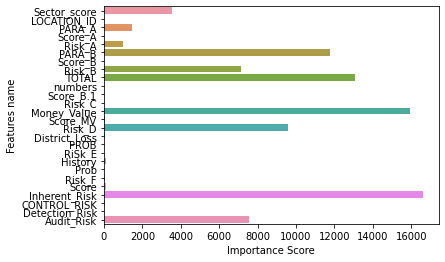

In [77]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
sns.barplot(x  = score,y = X.columns )
plt.xlabel('Importance Score')
plt.ylabel('Features name')
score

In [79]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
rf.feature_importances_

array([8.119e-04, 2.350e-03, 1.154e-02, 5.398e-03, 1.445e-02, 2.597e-02,
       1.710e-02, 1.598e-02, 6.431e-02, 5.519e-04, 3.807e-05, 3.398e-05,
       4.616e-02, 3.295e-02, 4.687e-02, 2.312e-02, 2.543e-04, 2.708e-02,
       2.691e-04, 0.000e+00, 1.513e-04, 1.193e-01, 2.171e-01, 3.457e-02,
       0.000e+00, 2.937e-01])

Text(0.5, 0, 'Feature Importance')

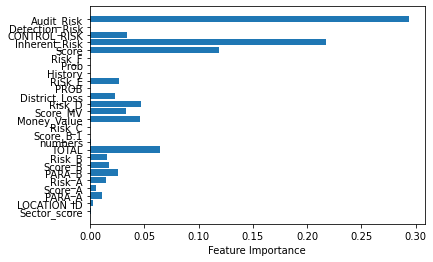

In [80]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [81]:
from sklearn.inspection import permutation_importance

In [82]:
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [83]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

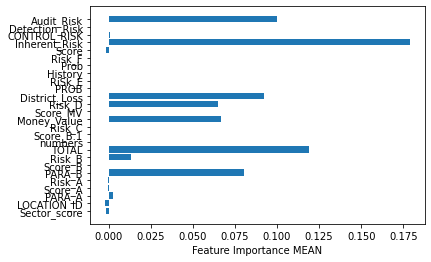

In [84]:
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

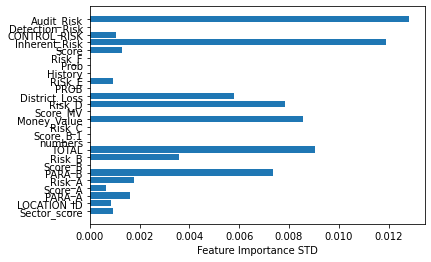

In [85]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [86]:
from sklearn.decomposition import PCA

In [87]:
Scaler =  StandardScaler()
df_scaled =  Scaler.fit_transform(X)

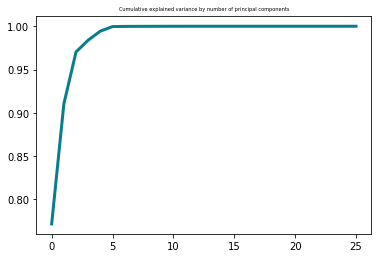

In [88]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [90]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
Sector_score,-4.427700,8.983553,22.135330,-0.263678,-0.072790,0.231089,0.006673,-0.001182,0.002903,-0.002435,...,0.000093,-0.000004,0.000001,0.000001,5.319816e-07,-1.572376e-07,2.602503e-08,-7.480432e-32,-0.000000e+00,0.0
LOCATION_ID,-0.400037,-1.983978,0.181319,-5.626470,8.179316,0.179845,0.009308,0.002787,0.000674,0.003482,...,-0.000018,-0.000042,-0.000014,-0.000002,-7.440201e-07,1.457153e-06,2.351826e-07,-1.770090e-31,6.217703e-32,0.0
PARA_A,3.855092,-0.941014,-0.344378,-0.119223,-0.273470,4.743580,-0.065651,0.002569,-0.107351,-0.009550,...,0.008028,-0.005693,0.003820,-0.000176,1.834503e-04,-1.416721e-05,4.117782e-07,-4.489253e-30,-4.331564e-30,0.0
Score_A,0.057545,-0.080228,-0.040328,0.010531,0.011017,0.046115,-0.001160,-0.015992,0.031352,-0.059469,...,0.023529,-0.003178,0.000029,0.003249,-9.695742e-04,-1.131046e-03,5.094189e-04,-1.716971e-15,1.048293e-17,0.0
Risk_A,2.336517,-0.590572,-0.209444,-0.068890,-0.153999,2.864092,-0.038457,-0.012012,-0.058767,-0.007214,...,-0.011005,0.019678,-0.026984,0.003045,1.187563e-04,4.579202e-05,-1.421516e-06,7.269984e-30,6.484063e-30,0.0


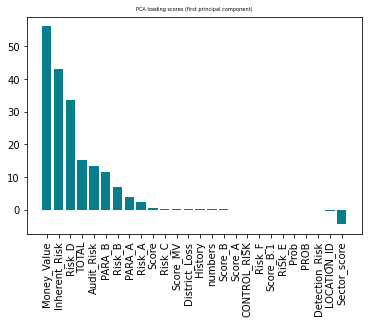

In [91]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

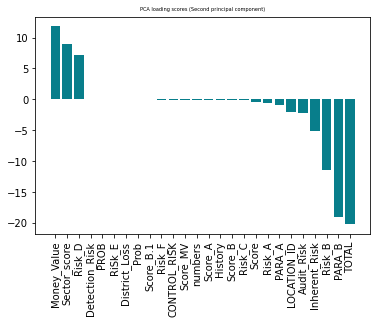

In [92]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (Second principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([21, 13,  6,  3,  8,  5,  7, 23, 22, 17,  0, 15, 25,  4,  2, 10, 11,
        9, 19, 12, 14, 18, 20, 16,  1, 24])

In [97]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['Score', 'Score_MV', 'Score_B', 'Score_A', 'TOTAL', 'PARA_B',
       'Risk_B', 'CONTROL_RISK', 'Inherent_Risk', 'RiSk_E',
       'Sector_score', 'District_Loss', 'Audit_Risk', 'Risk_A', 'PARA_A',
       'Score_B.1', 'Risk_C', 'numbers', 'Prob', 'Money_Value', 'Risk_D',
       'History', 'Risk_F', 'PROB', 'LOCATION_ID', 'Detection_Risk'],
      dtype=object)

In [98]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([1073.099,  576.973,  487.794,  378.601,  251.583,  211.281,
        205.282,  128.048,  125.992,  118.595,  116.549,  110.766,
        109.603,  105.16 ,  101.069,   87.819,   80.945,   61.748,
         59.591,   49.097,   47.992,   32.912,   24.88 ,   17.798,
          4.275,      nan])

Text(0, 0.5, 'Features')

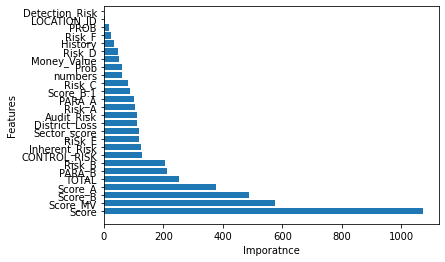

In [99]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [100]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Audit_Risk', 'Inherent_Risk', 'Score', 'TOTAL', 'Risk_B',
       'Risk_D', 'Money_Value', 'PARA_B', 'Score_MV', 'PARA_A', 'Score_B',
       'Risk_A', 'Score_A', 'CONTROL_RISK', 'Sector_score', 'RiSk_E',
       'District_Loss', 'numbers', 'History', 'Score_B.1', 'Risk_C',
       'Prob', 'Risk_F', 'LOCATION_ID', 'PROB', 'Detection_Risk'],
      dtype=object)

In [101]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.666, 0.568, 0.477, 0.355, 0.316, 0.313, 0.3  , 0.297, 0.287,
       0.247, 0.24 , 0.228, 0.217, 0.154, 0.12 , 0.117, 0.106, 0.086,
       0.086, 0.075, 0.071, 0.068, 0.055, 0.04 , 0.011, 0.   ])

Text(0, 0.5, 'Features')

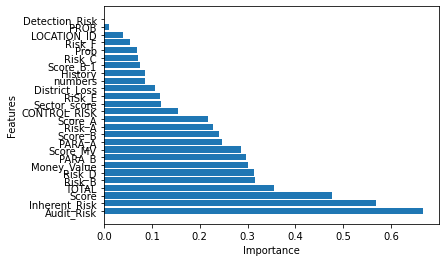

In [102]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [105]:
df_new['Risk'] = LabelEncoder().fit_transform(df_new['Risk'])
df_corr = df_new.corr()
df_corr.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.217724,-0.427975,-0.219995,-0.133234,-0.220443,-0.131142,-0.153966,-0.152502,-0.171165,...,-0.129340,-0.115293,-0.137511,-0.103665,-0.339585,-0.174041,-0.155790,NaN,-0.092368,-0.396591
PARA_A,-0.217724,1.000000,0.496187,0.999267,0.161610,0.357831,0.161512,0.266706,0.133373,0.140172,...,0.118261,0.117962,0.172257,0.103694,0.426005,0.481577,0.148577,NaN,0.219518,0.378008
Score_A,-0.427975,0.496187,1.000000,0.504378,0.248984,0.571429,0.247752,0.297051,0.242054,0.273863,...,0.101070,0.177411,0.264772,0.150441,0.719458,0.320291,0.169519,NaN,0.201458,0.618348
Risk_A,-0.219995,0.999267,0.504378,1.000000,0.164952,0.362238,0.164816,0.269882,0.135192,0.142619,...,0.117947,0.120810,0.175776,0.106271,0.431838,0.483005,0.150144,NaN,0.221337,0.384304
PARA_B,-0.133234,0.161610,0.248984,0.164952,1.000000,0.347265,0.999936,0.994102,0.209630,0.230601,...,0.078979,0.203407,0.316353,0.195892,0.396977,0.654349,0.186370,NaN,0.887775,0.256591


In [106]:
df_corr['Risk']

Sector_score     -0.396591
PARA_A            0.378008
Score_A           0.618348
Risk_A            0.384304
PARA_B            0.256591
Score_B           0.634784
Risk_B            0.254865
TOTAL             0.291515
numbers           0.307642
Score_B.1         0.353244
Risk_C            0.341598
Money_Value       0.256690
Score_MV          0.687724
Risk_D            0.253952
District_Loss     0.402943
PROB              0.176533
RiSk_E            0.410961
History           0.239058
Prob              0.298159
Risk_F            0.214156
Score             0.785263
Inherent_Risk     0.356468
CONTROL_RISK      0.415713
Detection_Risk         NaN
Audit_Risk        0.216754
Risk              1.000000
Name: Risk, dtype: float64

In [107]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [108]:
estimator = LinearSVC()

In [109]:
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [110]:
index = selector.ranking_.argsort()
index

array([25,  9, 14, 15,  8, 17, 11, 22,  7,  5, 23,  3, 24,  6, 10, 19, 16,
        2, 13,  1, 12, 21,  0,  4, 18, 20])

In [112]:
X.columns[index]

Index(['Audit_Risk', 'numbers', 'Risk_D', 'District_Loss', 'TOTAL', 'RiSk_E',
       'Risk_C', 'Inherent_Risk', 'Risk_B', 'PARA_B', 'CONTROL_RISK',
       'Score_A', 'Detection_Risk', 'Score_B', 'Score_B.1', 'Prob', 'PROB',
       'PARA_A', 'Score_MV', 'LOCATION_ID', 'Money_Value', 'Score',
       'Sector_score', 'Risk_A', 'History', 'Risk_F'],
      dtype='object')